In [12]:
#패키지 불러오기

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.formula.api import ols
from statsmodels.api import qqplot, add_constant
import statsmodels.formula.api as smf
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.preprocessing import StandardScaler
from statsmodels.tools.eval_measures import rmse
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import statsmodels.formula.api as smf
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import StandardScaler
from statsmodels.api import Logit
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import graphviz
from sklearn.tree import export_graphviz
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix

In [26]:
#데이터 불러오기

df = pd.read_csv ('유방암.csv', engine='python', encoding='euc-KR')
df.head()

,diagnosis,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,mean_compactness,mean_concavity,mean_concave_points,mean_symmetry,...,worst_radius,worst_texture,worst_perimeter,worst_area,worst_smoothness,worst_compactness,worst_concavity,worst_concave_points,worst_symmetry,worst_fractal_dimension
0,음성,15.12,16.68,98.78,716.6,0.08876,0.09588,0.07550,0.04079,0.1594,...,17.77,20.24,117.70,989.5,0.14910,0.3331,0.3327,0.12520,0.3415,0.09740
1,양성,10.80,9.71,68.77,357.6,0.09594,0.05736,0.02531,0.01698,0.1381,...,11.60,12.02,73.66,414.0,0.14360,0.1257,0.1047,0.04603,0.2090,0.07699
2,음성,18.31,18.58,118.60,1041.0,0.08588,0.08468,0.08169,0.05814,0.1621,...,21.31,26.36,139.20,1410.0,0.12340,0.2445,0.3538,0.15710,0.3206,0.06938
3,양성,14.92,14.93,96.45,686.9,0.08098,0.08549,0.05539,0.03221,0.1687,...,17.18,18.22,112.00,906.6,0.10650,0.2791,0.3151,0.11470,0.2688,0.08273
4,양성,12.89,13.12,81.89,515.9,0.06955,0.03729,0.02260,0.01171,0.1337,...,13.62,15.54,87.40,577.0,0.09616,0.1147,0.1186,0.05366,0.2309,0.06915


In [4]:
df.info()

#결측치 없음, 31개의 변수, 전부 실수

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 320 entries, 0 to 319
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                320 non-null    object 
 1   mean_radius              320 non-null    float64
 2   mean_texture             320 non-null    float64
 3   mean_perimeter           320 non-null    float64
 4   mean_area                320 non-null    float64
 5   mean_smoothness          320 non-null    float64
 6   mean_compactness         320 non-null    float64
 7   mean_concavity           320 non-null    float64
 8   mean_concave_points      320 non-null    float64
 9   mean_symmetry            320 non-null    float64
 10  mean_fractal_dimension   320 non-null    float64
 11  radius_error             320 non-null    float64
 12  texture_error            320 non-null    float64
 13  perimeter_error          320 non-null    float64
 14  area_error               3

In [6]:
#결측치 확인 한 눈에 > 대체할 결측치 존재 x

df.isnull().sum()

diagnosis                  0
mean_radius                0
mean_texture               0
mean_perimeter             0
mean_area                  0
mean_smoothness            0
mean_compactness           0
mean_concavity             0
mean_concave_points        0
mean_symmetry              0
mean_fractal_dimension     0
radius_error               0
texture_error              0
perimeter_error            0
area_error                 0
smoothness_error           0
compactness_error          0
concavity_error            0
concave_points_error       0
symmetry_error             0
fractal_dimension_error    0
worst_radius               0
worst_texture              0
worst_perimeter            0
worst_area                 0
worst_smoothness           0
worst_compactness          0
worst_concavity            0
worst_concave_points       0
worst_symmetry             0
worst_fractal_dimension    0
dtype: int64

In [27]:
#목표변수와 설명변수 지정

df_raw_y = df['diagnosis'] #목표변수
df_raw_x = df.drop('diagnosis', axis=1, inplace=False) #설명변수

In [28]:
#데이터 구성하기 - 더미변수 생성
#get_dummies : 데이터의 문자형 변수에 대한 더미변수 생성

df_raw_dummy = pd.get_dummies(df_raw_x)

#더미 변수로 생성된 데이터 확인
df_raw_dummy.head()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,mean_compactness,mean_concavity,mean_concave_points,mean_symmetry,mean_fractal_dimension,...,worst_radius,worst_texture,worst_perimeter,worst_area,worst_smoothness,worst_compactness,worst_concavity,worst_concave_points,worst_symmetry,worst_fractal_dimension
0,15.12,16.68,98.78,716.6,0.08876,0.09588,0.07550,0.04079,0.1594,0.05986,...,17.77,20.24,117.70,989.5,0.14910,0.3331,0.3327,0.12520,0.3415,0.09740
1,10.80,9.71,68.77,357.6,0.09594,0.05736,0.02531,0.01698,0.1381,0.06400,...,11.60,12.02,73.66,414.0,0.14360,0.1257,0.1047,0.04603,0.2090,0.07699
2,18.31,18.58,118.60,1041.0,0.08588,0.08468,0.08169,0.05814,0.1621,0.05425,...,21.31,26.36,139.20,1410.0,0.12340,0.2445,0.3538,0.15710,0.3206,0.06938
3,14.92,14.93,96.45,686.9,0.08098,0.08549,0.05539,0.03221,0.1687,0.05669,...,17.18,18.22,112.00,906.6,0.10650,0.2791,0.3151,0.11470,0.2688,0.08273
4,12.89,13.12,81.89,515.9,0.06955,0.03729,0.02260,0.01171,0.1337,0.05581,...,13.62,15.54,87.40,577.0,0.09616,0.1147,0.1186,0.05366,0.2309,0.06915


In [31]:
#데이터 구성하기

df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df_raw_dummy, df_raw_y, test_size=0.4, random_state=1234)
print("train data X size : {}".format(df_train_x.shape))
print("train data Y size : {}".format(df_train_y.shape))
print("test data X size : {}".format(df_test_x.shape))
print("test data Y size : {}".format(df_test_y.shape))

train data X size : (192, 30)
train data Y size : (192,)
test data X size : (128, 30)
test data Y size : (128,)


In [32]:
#기본 옵션으로 모델 생성 

tree_uncustomized = DecisionTreeClassifier(random_state=1234)
tree_uncustomized.fit(df_train_x,df_train_y)

#train의 정확도
print('Accuracy on training set : {:.3f}'.format(tree_uncustomized.score(df_train_x,df_train_y)))
#test의 정확도
print('Accuracy on test set : {:.3f}'.format(tree_uncustomized.score(df_test_x,df_test_y)))


Accuracy on training set : 1.000
Accuracy on test set : 0.883


## 모델 정확도는 trian 100%, test 88.3%로 모델은 train 데이터에 과대적합임을 알 수 있다.

In [34]:
# 현재 생성된 모델의 옵션 확인

tree_uncustomized

#전 항상 이전 과제부터 이건 자세히 안뜨더라구요,,,8ㅇ8

DecisionTreeClassifier(random_state=1234)

In [35]:
#모델 Parameter 조정
#max_depth : 최대 깊이 변경에 따른 모델 성능 
#(이건 각 모델의 중요도에 따라서, 순서를 달리 해서 parameter 값을 정해도 되지만,중요도를 알기는 어려우므로, 그냥 원하는 것부터 설정한다.)

train_accuracy =[] #train 정확도 결과 저장
test_accuracy=[] #test 정확도 결과 저장

# max_depth : 최대 깊이

para_depth = [depth for depth in range(1,11)]
for v_max_depth in para_depth :
    tree=DecisionTreeClassifier(max_depth=v_max_depth, random_state=1234)
    tree.fit(df_train_x, df_train_y)
    train_accuracy.append(tree.score(df_train_x,df_train_y))
    test_accuracy.append(tree.score(df_test_x,df_test_y))
    
#데이터 저장하고, 모델 정확도 확인    
    
df_accuracy_depth = pd.DataFrame()
df_accuracy_depth['Depth'] =para_depth
df_accuracy_depth['TrainAccuracy'] =train_accuracy
df_accuracy_depth['TestAccuracy'] =test_accuracy
df_accuracy_depth.round(3)

,Depth,TrainAccuracy,TestAccuracy
0,1,0.932,0.852
1,2,0.979,0.875
2,3,0.995,0.875
3,4,1.000,0.883
4,5,1.000,0.883
5,6,1.000,0.883
6,7,1.000,0.883
7,8,1.000,0.883
8,9,1.000,0.883
9,10,1.000,0.883


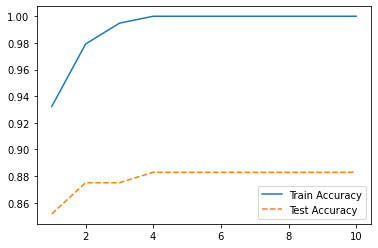

In [36]:
#모델 정확도 그래프로 확인

plt.plot(para_depth, train_accuracy, linestyle='-', label='Train Accuracy')
plt.plot(para_depth, test_accuracy, linestyle = '--', label = 'Test Accuracy')
plt.legend()

## 최대 깊이 증가에 따라 모델의 정확도는 증가하므로,
## Train, test 데이터의 성능 변화를 고려하여 2와 4를 비교하여 본다.

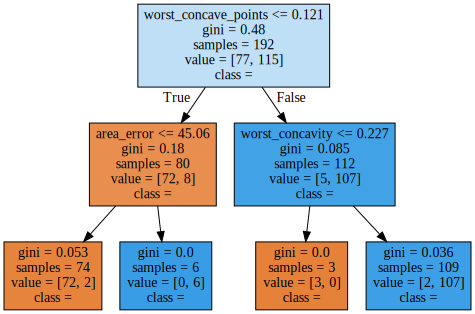

In [37]:
#변수명 저장
v_feature_name= df_train_x.columns

#깊이가 2인 모델
tree_low = DecisionTreeClassifier(random_state=1234, max_depth=2)
tree_low.fit(df_train_x,df_train_y)

#트리 모델을 tree_low.dot 파일로 저장 (목표변수 양성과 음성)
export_graphviz(tree_low, out_file='tree_low.dot', class_names=['양성','음성'],feature_names = v_feature_name, impurity=True, filled=True)
with open ('tree_low.dot') as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

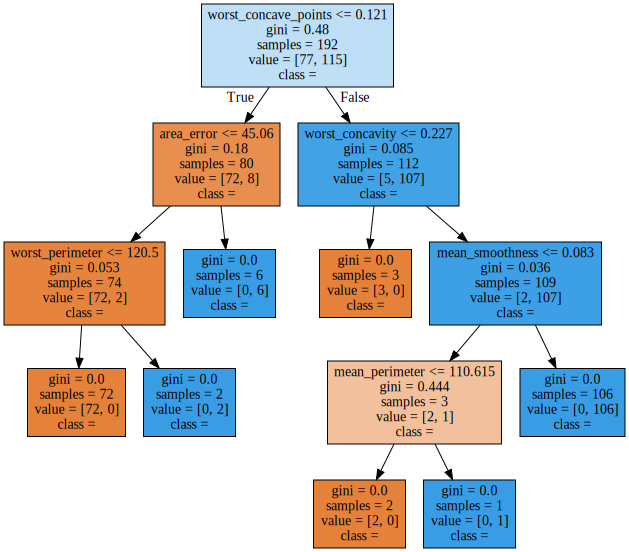

In [38]:
#변수명 저장
v_feature_name= df_train_x.columns

#깊이가 4인 모델
tree_low = DecisionTreeClassifier(random_state=1234, max_depth=4)
tree_low.fit(df_train_x,df_train_y)

#트리 모델을 tree_low.dot 파일로 저장 (목표변수 양성과 음성)
export_graphviz(tree_low, out_file='tree_low.dot', class_names=['양성','음성'],feature_names = v_feature_name, impurity=True, filled=True)
with open ('tree_low.dot') as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

## 깊이 증가 시, 과대적합에 대한 확인이 필요하므로, max_depth를 2로 설정한다.

In [41]:
##모델 parameter 조정
#min_samples_split: 분리 노드의 최소 자료 수 변경에 따른 모델 성능

train_accuracy =[] #train 정확도 결과 저장
test_accuracy=[] #test 정확도 결과 저장

para_split = [n_split*10 for n_split in range(1,11)]

#min_samples_split : 분리 노드의 최소 자료 수

for v_min_samples_split in para_split :
    tree=DecisionTreeClassifier(random_state=1234, max_depth=2, min_samples_split=v_min_samples_split)
    tree.fit(df_train_x, df_train_y)
    train_accuracy.append(tree.score(df_train_x,df_train_y))
    test_accuracy.append(tree.score(df_test_x,df_test_y))

#데이터 저장하고, 모델 정확도 확인    
df_accuracy_split = pd.DataFrame()
df_accuracy_split['MinSamplesSplit'] =para_split
df_accuracy_split['TrainAccuracy'] =train_accuracy
df_accuracy_split['TestAccuracy'] =test_accuracy
df_accuracy_split.round(3) 

,MinSamplesSplit,TrainAccuracy,TestAccuracy
0,10,0.979,0.875
1,20,0.979,0.875
2,30,0.979,0.875
3,40,0.979,0.875
4,50,0.979,0.875
5,60,0.979,0.875
6,70,0.979,0.875
7,80,0.979,0.875
8,90,0.948,0.852
9,100,0.948,0.852


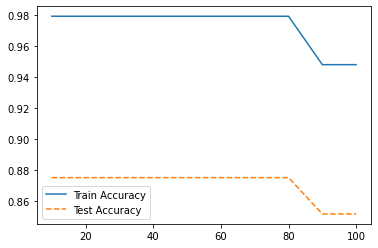

In [42]:
#모델 정확도 그래프로 확인

plt.plot(para_split, train_accuracy, linestyle='-', label='Train Accuracy')
plt.plot(para_split, test_accuracy, linestyle = '--', label = 'Test Accuracy')
plt.legend()

## 분리 노드의 최소 자료 수 증가에 따라 모델의 정확도는 감소하므로,
## train/test 데이터의 성능 변화를 고려하여, 80과 90을 비교해보고, 80 선택

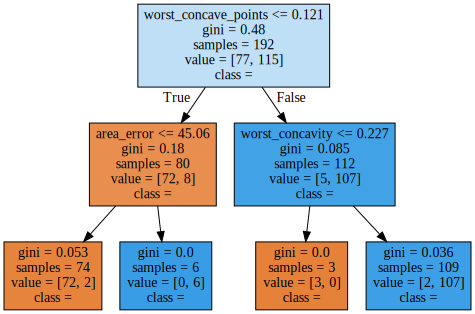

In [43]:
#분리 노드의 최소 자료 수가 80인 모델
tree_low = DecisionTreeClassifier(random_state=1234, max_depth=2, min_samples_split=80)
tree_low.fit(df_train_x,df_train_y)

export_graphviz(tree_low, out_file='tree_low.dot', class_names=['양성','음성'],feature_names = v_feature_name, impurity=True, filled=True)
with open ('tree_low.dot') as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

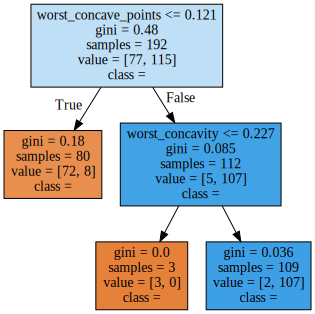

In [44]:
#분리 노드의 최소 자료 수가 80인 모델
tree_low = DecisionTreeClassifier(random_state=1234, max_depth=2, min_samples_split=90)
tree_low.fit(df_train_x,df_train_y)

export_graphviz(tree_low, out_file='tree_low.dot', class_names=['양성','음성'],feature_names = v_feature_name, impurity=True, filled=True)
with open ('tree_low.dot') as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

## 분리 노드의 최소 자료 수가 90인 경우, 과소적합 될 수 있으므로, 80을 선택한다.

In [46]:
##모델 parameter 조정
#min_samples_leaf 잎사귀 노드의 최소 자료 수 변경에 따른 모델 성능

train_accuracy =[] #train 정확도 결과 저장
test_accuracy=[] #test 정확도 결과 저장

para_leaf = [n_leaf*2 for n_leaf in range(1,11)]

#min_samples_leaf : 잎사귀 노드의 최소 자료 수

for v_min_samples_leaf in para_leaf :
    tree=DecisionTreeClassifier(random_state=1234, max_depth=2, min_samples_leaf=v_min_samples_leaf, min_samples_split=80)
    tree.fit(df_train_x, df_train_y)
    train_accuracy.append(tree.score(df_train_x,df_train_y))
    test_accuracy.append(tree.score(df_test_x,df_test_y))

#데이터 저장하고, 모델 정확도 확인    
df_accuracy_leaf = pd.DataFrame()
df_accuracy_leaf['MinSamplesLeaf'] =para_leaf
df_accuracy_leaf['TrainAccuracy'] =train_accuracy
df_accuracy_leaf['TestAccuracy'] =test_accuracy
df_accuracy_leaf.round(3) 

,MinSamplesLeaf,TrainAccuracy,TestAccuracy
0,2,0.979,0.875
1,4,0.974,0.867
2,6,0.964,0.859
3,8,0.958,0.898
4,10,0.953,0.914
5,12,0.943,0.906
6,14,0.932,0.852
7,16,0.932,0.852
8,18,0.932,0.852
9,20,0.932,0.852


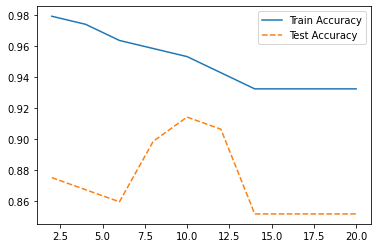

In [47]:
#모델 정확도 그래프로 확인

plt.plot(para_leaf, train_accuracy, linestyle='-', label='Train Accuracy')
plt.plot(para_leaf, test_accuracy, linestyle = '--', label = 'Test Accuracy')
plt.legend()

## 잎사귀 노드 최소 자료 수 증가에 따라 모델의 정확도는 감소하므로,
## train/test 데이터의 성능 변화를 고려하여, 10과 12를 비교하여 확인한다.

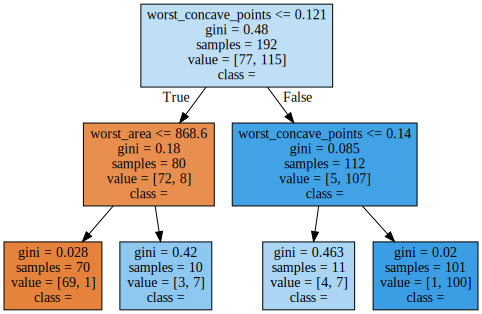

In [48]:
#잎사귀 노드의 최소 자료 수가 10인 모델
tree_low = DecisionTreeClassifier(random_state=1234, max_depth=2, min_samples_split=80, min_samples_leaf=10)
tree_low.fit(df_train_x,df_train_y)

export_graphviz(tree_low, out_file='tree_low.dot', class_names=['양성','음성'],feature_names = v_feature_name, impurity=True, filled=True)
with open ('tree_low.dot') as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

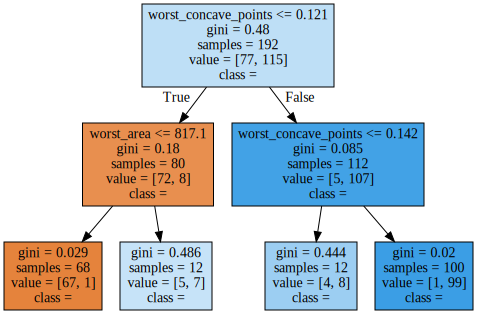

In [49]:
#잎사귀 노드의 최소 자료 수가 12인 모델
tree_low = DecisionTreeClassifier(random_state=1234, max_depth=2, min_samples_split=80, min_samples_leaf=12)
tree_low.fit(df_train_x,df_train_y)

export_graphviz(tree_low, out_file='tree_low.dot', class_names=['양성','음성'],feature_names = v_feature_name, impurity=True, filled=True)
with open ('tree_low.dot') as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

## 트리 형태가 거의 비슷하나, 잎사귀 노드의 최소 자료 수가 12일 때가 좀 더 자료가 흝어져 있으므로,
## min_samples_leaf 로 12 선정

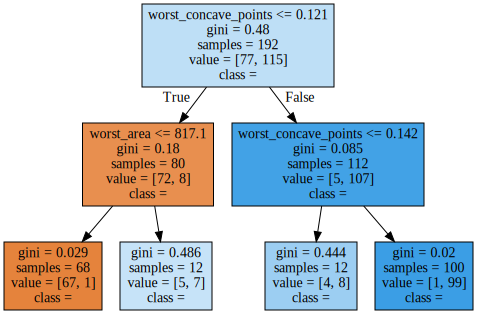

In [51]:
#최종 모델 선정
#잎사귀 노드는 12, 분리 노드는 80, 최대 깊이는 2

tree_final = DecisionTreeClassifier(random_state=1234, max_depth=2, min_samples_split=80, min_samples_leaf=12)
tree_final.fit(df_train_x,df_train_y)

#최종 모델 시각화
export_graphviz(tree_final, out_file='tree_final.dot', class_names=['양성','음성'],feature_names = v_feature_name,
                impurity=True, filled=True)

with open('tree_final.dot') as f:
    dot_graph = f.read()

display(graphviz.Source(dot_graph))

## 트리 분리에 영향이 큰 변수는, worst_concave_points, worst_area, worst_concave_points 등이다.
## worst_concave_points가 0.121보다 같거나 낮으면, 자료 수는 80, 양성 비율이 증가하고, gini 지수는 감소한다. 0.121보다 크면, 음성 비율이 증가하고, gini 지수는 감소하는 식으로, 왼쪽은 True, 오른쪽은 False로 적용된다.

In [60]:
y_pred=tree_final.predict(df_test_x)
print('Accuracy:{:.3f}\n'.format(tree_final.score(df_test_x,df_test_y)))
print('Confusion matrix: \n{}'.format(confusion_matrix(df_test_y,y_pred)))

Accuracy:0.906

Confusion matrix: 
[[22  9]
 [ 3 94]]


## 최종모델을 이용해 분류를 예측하면, 정분류율은 90.625%이고, 오분류율은 9.375%이다.
## confusion matrix 는 위와 같다.

In [61]:
# 결론 도출
# feature_importances_ 로 설명변수 중요도 확인 및 테이블로 저장

df_importance = pd.DataFrame()
df_importance['Feature'] = v_feature_name
df_importance['Importance'] = tree_final.feature_importances_ #tree.feature_importances_ : 설명변수의 중요도

#df_feature_importance의 테이블을 중요도별로 정렬
df_importance.sort_values('Importance', ascending=False, inplace=True)
df_importance.round(3) #소수점 셋째 자리까지 구함

,Feature,Importance
27,worst_concave_points,0.914
23,worst_area,0.086
0,mean_radius,0.000
1,mean_texture,0.000
28,worst_symmetry,0.000
26,worst_concavity,0.000
25,worst_compactness,0.000
24,worst_smoothness,0.000
22,worst_perimeter,0.000
21,worst_texture,0.000


Text(0, 0.5, '설명변수')

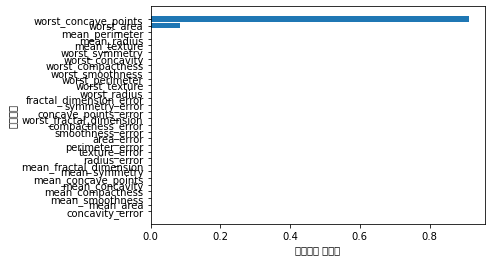

In [68]:
#설명변수 중요도 그래프
#중요도가 높은 변수를 상위에 그림

df_importance.sort_values('Importance', ascending=True, inplace=True)
coordinates = range(len(df_importance))
plt.barh(y=coordinates, width=df_importance['Importance'])
plt.yticks(coordinates, df_importance['Feature'])
plt.xlabel('설명변수 중요도')
plt.ylabel('설명변수')

## 중요 설명변수 : worst_concave_points, worst_area 순으로 영향이 크다고 해석 할 수 있다.
## 단, 계산된 변수의 중요도가 낮아도, 선택되는 데이터에 따라 중요도가 변경 될 수 있으므로, 
## 중요하지 않은 데이터로 단정지어선 안된다.

In [71]:
print('final model의 train 정확도:{:.3f}'.format(tree_final.score(df_train_x,df_train_y)))
print('final model의 test 정확도:{:.3f}'.format(tree_final.score(df_test_x,df_test_y)))

final model의 train 정확도:0.943
final model의 test 정확도:0.906


## final model의 train 정확도는 94.3%, test 정확도는 90.6%로, 유사한 수준이나 모델은 train 데이터에 부분적으로 과대적합이라 할 수 있다.
## 그러나 train의 정확도가 94.3%로 높은 정확도라고 말하기는 어렵다.

# 
# 랜덤 포레스트 실습 과제

In [69]:
#패키지 추가 불러오기
from sklearn.ensemble import RandomForestClassifier

In [117]:
# 같은 데이터를 사용하기 때문에, 앞에서 저장해둔 값을 불러온다.
df = pd.read_csv ('유방암.csv', engine='python', encoding='euc-KR')
df.head()

,diagnosis,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,mean_compactness,mean_concavity,mean_concave_points,mean_symmetry,...,worst_radius,worst_texture,worst_perimeter,worst_area,worst_smoothness,worst_compactness,worst_concavity,worst_concave_points,worst_symmetry,worst_fractal_dimension
0,음성,15.12,16.68,98.78,716.6,0.08876,0.09588,0.07550,0.04079,0.1594,...,17.77,20.24,117.70,989.5,0.14910,0.3331,0.3327,0.12520,0.3415,0.09740
1,양성,10.80,9.71,68.77,357.6,0.09594,0.05736,0.02531,0.01698,0.1381,...,11.60,12.02,73.66,414.0,0.14360,0.1257,0.1047,0.04603,0.2090,0.07699
2,음성,18.31,18.58,118.60,1041.0,0.08588,0.08468,0.08169,0.05814,0.1621,...,21.31,26.36,139.20,1410.0,0.12340,0.2445,0.3538,0.15710,0.3206,0.06938
3,양성,14.92,14.93,96.45,686.9,0.08098,0.08549,0.05539,0.03221,0.1687,...,17.18,18.22,112.00,906.6,0.10650,0.2791,0.3151,0.11470,0.2688,0.08273
4,양성,12.89,13.12,81.89,515.9,0.06955,0.03729,0.02260,0.01171,0.1337,...,13.62,15.54,87.40,577.0,0.09616,0.1147,0.1186,0.05366,0.2309,0.06915


In [118]:
df.info()

#결측치 없음, 31개의 변수, 전부 실수

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 320 entries, 0 to 319
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                320 non-null    object 
 1   mean_radius              320 non-null    float64
 2   mean_texture             320 non-null    float64
 3   mean_perimeter           320 non-null    float64
 4   mean_area                320 non-null    float64
 5   mean_smoothness          320 non-null    float64
 6   mean_compactness         320 non-null    float64
 7   mean_concavity           320 non-null    float64
 8   mean_concave_points      320 non-null    float64
 9   mean_symmetry            320 non-null    float64
 10  mean_fractal_dimension   320 non-null    float64
 11  radius_error             320 non-null    float64
 12  texture_error            320 non-null    float64
 13  perimeter_error          320 non-null    float64
 14  area_error               3

In [119]:
#결측치 확인 한 눈에 > 대체할 결측치 존재 x

df.isnull().sum()

diagnosis                  0
mean_radius                0
mean_texture               0
mean_perimeter             0
mean_area                  0
mean_smoothness            0
mean_compactness           0
mean_concavity             0
mean_concave_points        0
mean_symmetry              0
mean_fractal_dimension     0
radius_error               0
texture_error              0
perimeter_error            0
area_error                 0
smoothness_error           0
compactness_error          0
concavity_error            0
concave_points_error       0
symmetry_error             0
fractal_dimension_error    0
worst_radius               0
worst_texture              0
worst_perimeter            0
worst_area                 0
worst_smoothness           0
worst_compactness          0
worst_concavity            0
worst_concave_points       0
worst_symmetry             0
worst_fractal_dimension    0
dtype: int64

In [120]:
#목표변수와 설명변수 지정

df_raw_y = df['diagnosis'] #목표변수
df_raw_x = df.drop('diagnosis', axis=1, inplace=False) #설명변수

In [121]:
#데이터 구성하기

df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df_raw_x, df_raw_y, test_size=0.4, random_state=1234)
print("train data X size : {}".format(df_train_x.shape))
print("train data Y size : {}".format(df_train_y.shape))
print("test data X size : {}".format(df_test_x.shape))
print("test data Y size : {}".format(df_test_y.shape))

train data X size : (192, 30)
train data Y size : (192,)
test data X size : (128, 30)
test data Y size : (128,)


In [122]:
#기본 옵션으로 모델 생성
#랜덤 포레스트 모델 생성 
rf_uncustomized = RandomForestClassifier(random_state=1234)
rf_uncustomized.fit(df_train_x,df_train_y)

#train data 정확도
print('Accuracy on training set :{:.3f}'.format(rf_uncustomized.score(df_train_x,df_train_y)))
#test data 정확도
print('Accuracy on test set :{:.3f}'.format(rf_uncustomized.score(df_test_x,df_test_y)))

Accuracy on training set :1.000
Accuracy on test set :0.914


## 모델의 정확도는train 100%, test 91.4%로 모델은 train 데이터에 과대적합이다.

In [123]:
#현재 생성된 랜덤 포레스트 모델 확인
rf_uncustomized

RandomForestClassifier(random_state=1234)

In [124]:
#모델 parameter 조정
#n_estimators : 트리 수 변경에 따른 모델 성능

train_accuracy =[] #train 정확도 결과 저장
test_accuracy=[] #test 정확도 결과 저장

para_n_tree = [n_tree*10 for n_tree in range(1,16)]
for v_n_estimators in para_n_tree :
    rf=RandomForestClassifier(random_state=1234, n_estimators =v_n_estimators)
    rf.fit(df_train_x, df_train_y)
    train_accuracy.append(rf.score(df_train_x,df_train_y))
    test_accuracy.append(rf.score(df_test_x,df_test_y))
    
#결과 저장, 모델 정확도 확인
df_accuracy_n = pd.DataFrame()
df_accuracy_n['n_estimators'] =para_n_tree
df_accuracy_n['TrainAccuracy'] =train_accuracy
df_accuracy_n['TestAccuracy'] =test_accuracy
df_accuracy_n.round(3)

,n_estimators,TrainAccuracy,TestAccuracy
0,10,0.995,0.906
1,20,1.000,0.914
2,30,1.000,0.906
3,40,1.000,0.906
4,50,1.000,0.922
5,60,1.000,0.922
6,70,1.000,0.914
7,80,1.000,0.914
8,90,1.000,0.922
9,100,1.000,0.914


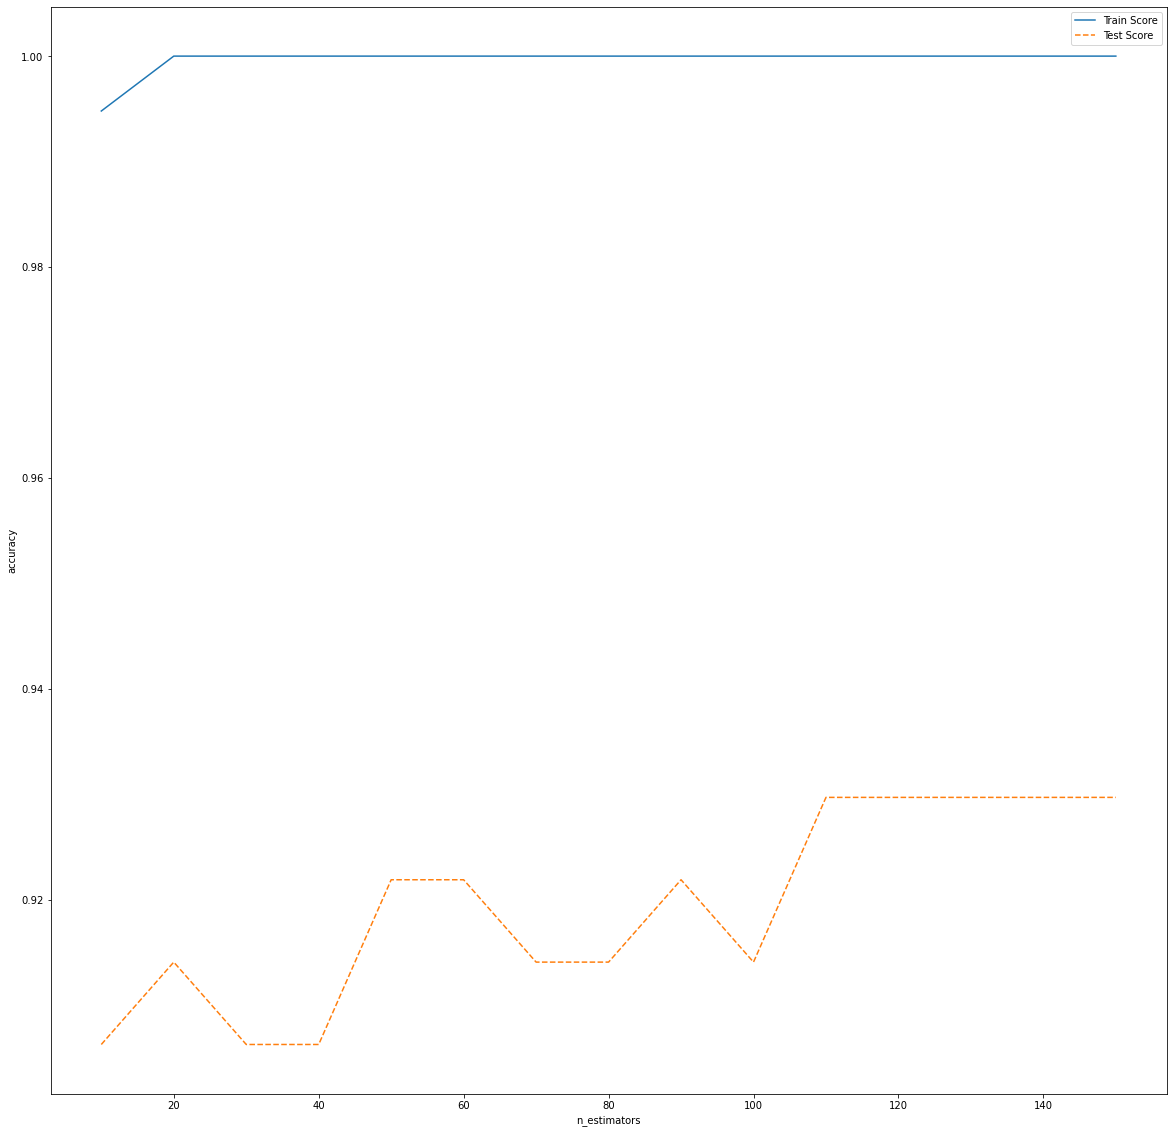

In [125]:
#모델 정확도 그래프로 확인

plt.plot(para_n_tree, train_accuracy, linestyle='-', label='Train Score')
plt.plot(para_n_tree, test_accuracy, linestyle = '--', label = 'Test Score')
plt.ylabel('accuracy');plt.xlabel('n_estimators')
plt.legend()

## 생성하는 결정 트리 수 증가에 따라 모델의 정확도는 증가한다.
## Train/ Test 데이터의 성능 변화를 고려하여 20, 50, 110 중 하나를 선택 할 수 있다.
## 단, train 데이터의 성능 변화는 없고, test 데이터의 성능 변화를 고려하여 50 선택하였다.
## OOB를 이용한 적정 나무 확인 가능

In [126]:
#n_estimators : 트리 수 변경에 따른 모델 oob error 변화

#error 저장 리스트
oob_error=[]

for v_n_estimator in range(1,201):
    rf=RandomForestClassifier(n_estimators=v_n_estimator, oob_score=True, random_state=1234)
    rf.fit(df_train_x, df_train_y)
    oob_error.append(1-rf.oob_score_)
    
#자료의 크기가 적어서 error가 생깁니다!

/home/piai/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:540: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/piai/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:544: RuntimeWarning: invalid value encountered in true_divide
  decision = (predictions[k] /
/home/piai/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:540: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/piai/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:544: RuntimeWarning: invalid value encountered in true_divide
  decision = (predictions[k] /
/home/piai/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:540: UserWarning: Some inputs do not have OOB scores. This prob

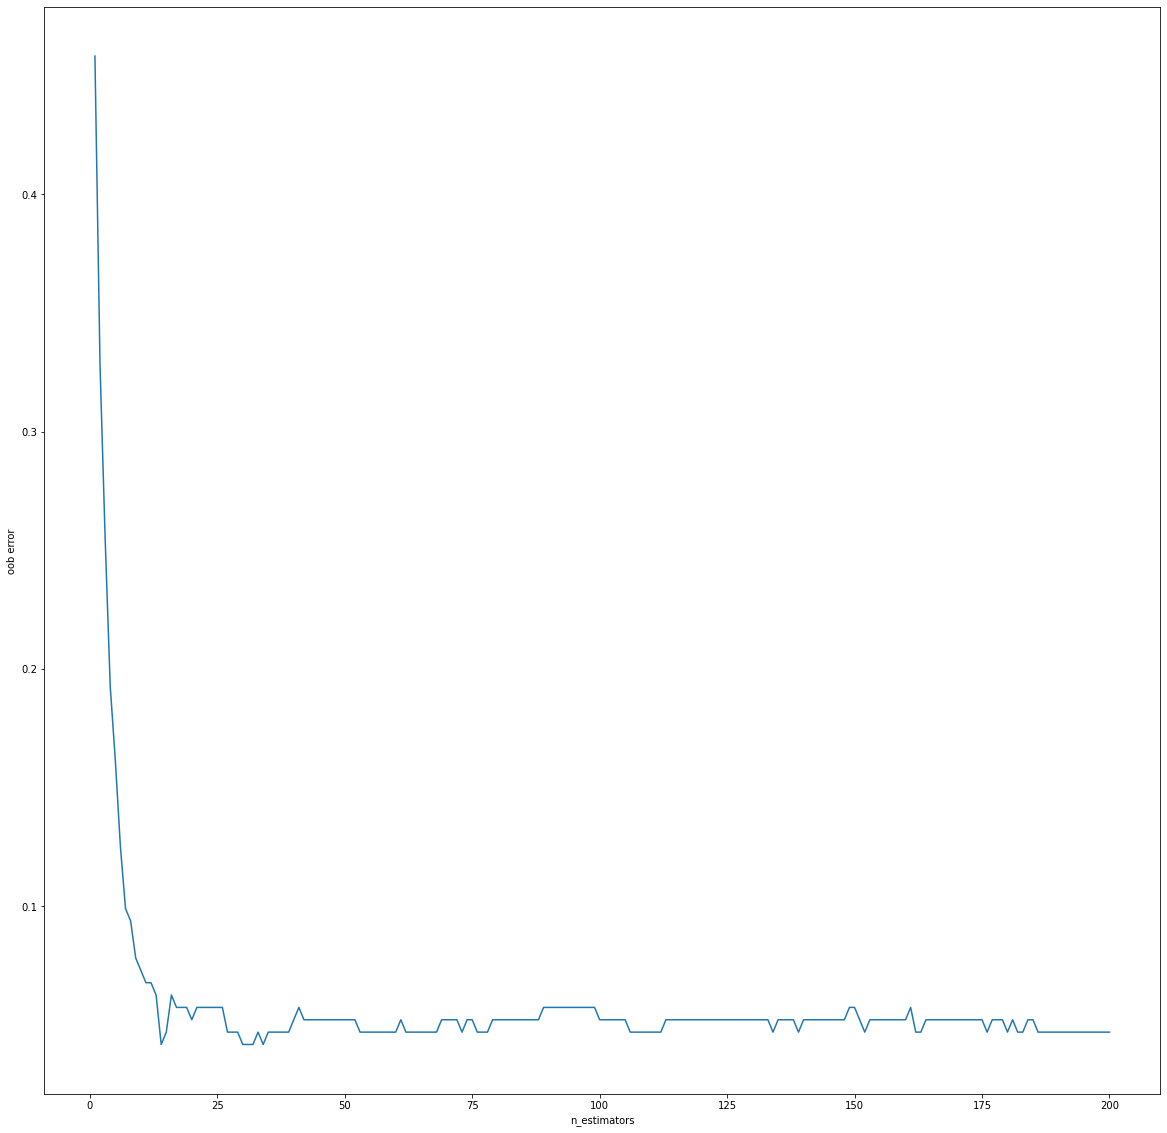

In [127]:
#트리 수 변경에 따른 모델 oob error 변화 그래프로 표현
plt.plot(range(1,201), oob_error)
plt.ylabel('oob error')
plt.xlabel('n_estimators')
plt.rcParams["figure.figsize"] = (20, 20) #그래프가 작아서 잘 보이지 않아서 크기 확대

## 생성하는 결정 트리 수 증가에 따라 모델 정확도는 증가하며, OOB error는 감소한다.
## 모델의 특성을 고려하고, 앞의 결과와 종합하여 110 선택

In [116]:
#앞서 유방암을 의사결정 나무로 확인 할 때, 값이 많이 낮았으므로, 이번에는 잎사귀부터 지정하기로 했다.
#모델 parameter 조정
#n_estimators =110 지정
#잎사귀 노드의 최소 자료 수 변경에 따른 모델 성능

train_accuracy =[] #train 정확도 결과 저장
test_accuracy=[] #test 정확도 결과 저장

#min_samples_leaf : 잎사귀 노드의 최소 자료 수 제한
para_leaf = [n_leaf*10 for n_leaf in range(1,11)]
for v_min_samples_leaf in para_leaf :
    rf=RandomForestClassifier(random_state=1234, n_estimators =110, min_samples_leaf=v_min_samples_leaf)
    rf.fit(df_train_x, df_train_y)
    train_accuracy.append(rf.score(df_train_x,df_train_y))
    test_accuracy.append(rf.score(df_test_x,df_test_y))

#모델 정확도 확인
    
df_accuracy_leaf = pd.DataFrame()
df_accuracy_leaf['MinSamplesLeaf'] =para_leaf
df_accuracy_leaf['TrainAccuracy'] =train_accuracy
df_accuracy_leaf['TestAccuracy'] =test_accuracy
df_accuracy_leaf.round(3)

,MinSamplesLeaf,TrainAccuracy,TestAccuracy
0,10,0.974,0.906
1,20,0.969,0.906
2,30,0.969,0.898
3,40,0.948,0.906
4,50,0.964,0.914
5,60,0.953,0.914
6,70,0.599,0.758
7,80,0.599,0.758
8,90,0.599,0.758
9,100,0.599,0.758


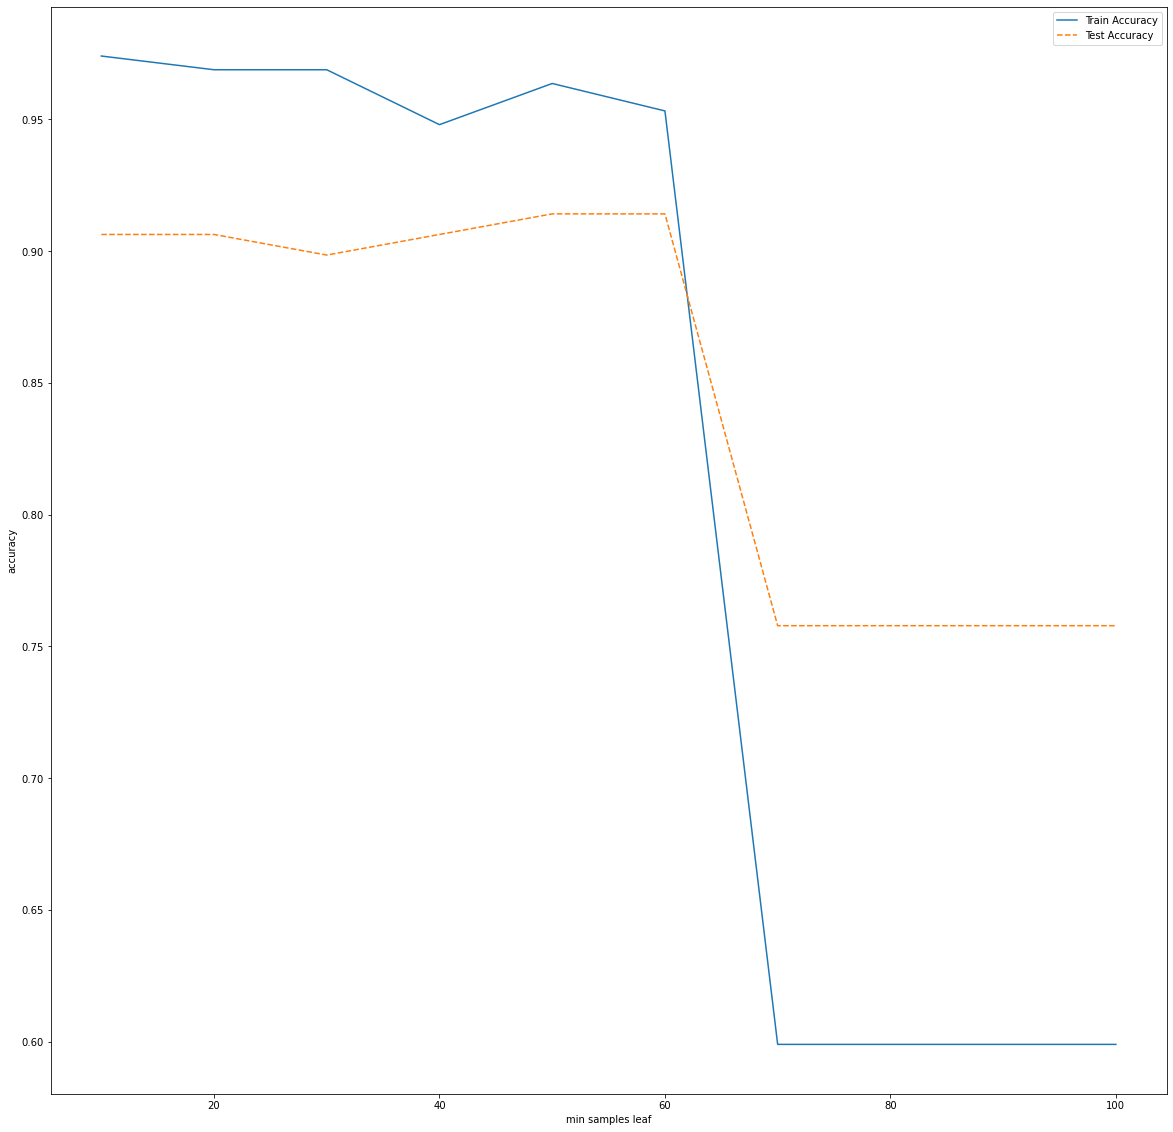

In [100]:
#모델 정확도 그래프로 확인

plt.plot(para_leaf, train_accuracy, linestyle='-', label='Train Accuracy')
plt.plot(para_leaf, test_accuracy, linestyle = '--', label = 'Test Accuracy')
plt.ylabel('accuracy');plt.xlabel('min samples leaf')
plt.legend()

## 잎사귀 노드는 최소 자료 수 증가에 따라 모델의 정확도가 감소한다.
## 따라서, train과 test 데이터의 성능 변화를 고려하여 40과 50 중에 40 선택

In [101]:
#모델 parameter 조정
#min_samples_leaf =40 지정
#분리 노드의 최소 자료 수 변경에 따른 모델 성능

train_accuracy =[] #train 정확도 결과 저장
test_accuracy=[] #test 정확도 결과 저장

#min_samples_split : 분할 하기 위한 노드의 최소 샘플 수
para_split = [n_split*10 for n_split in range(1,11)]
for v_min_samples_split in para_split :
    rf=RandomForestClassifier(random_state=1234, n_estimators =110, min_samples_leaf=40, min_samples_split=v_min_samples_split)
    rf.fit(df_train_x, df_train_y)
    train_accuracy.append(rf.score(df_train_x,df_train_y))
    test_accuracy.append(rf.score(df_test_x,df_test_y))

#모델 정확도 확인
    
df_accuracy_split = pd.DataFrame()
df_accuracy_split['MinSamplesSplit'] =para_split
df_accuracy_split['TrainAccuracy'] =train_accuracy
df_accuracy_split['TestAccuracy'] =test_accuracy
df_accuracy_split.round(3)

,MinSamplesSplit,TrainAccuracy,TestAccuracy
0,10,0.948,0.906
1,20,0.948,0.906
2,30,0.948,0.906
3,40,0.948,0.906
4,50,0.948,0.906
5,60,0.948,0.906
6,70,0.948,0.906
7,80,0.948,0.906
8,90,0.948,0.906
9,100,0.948,0.906


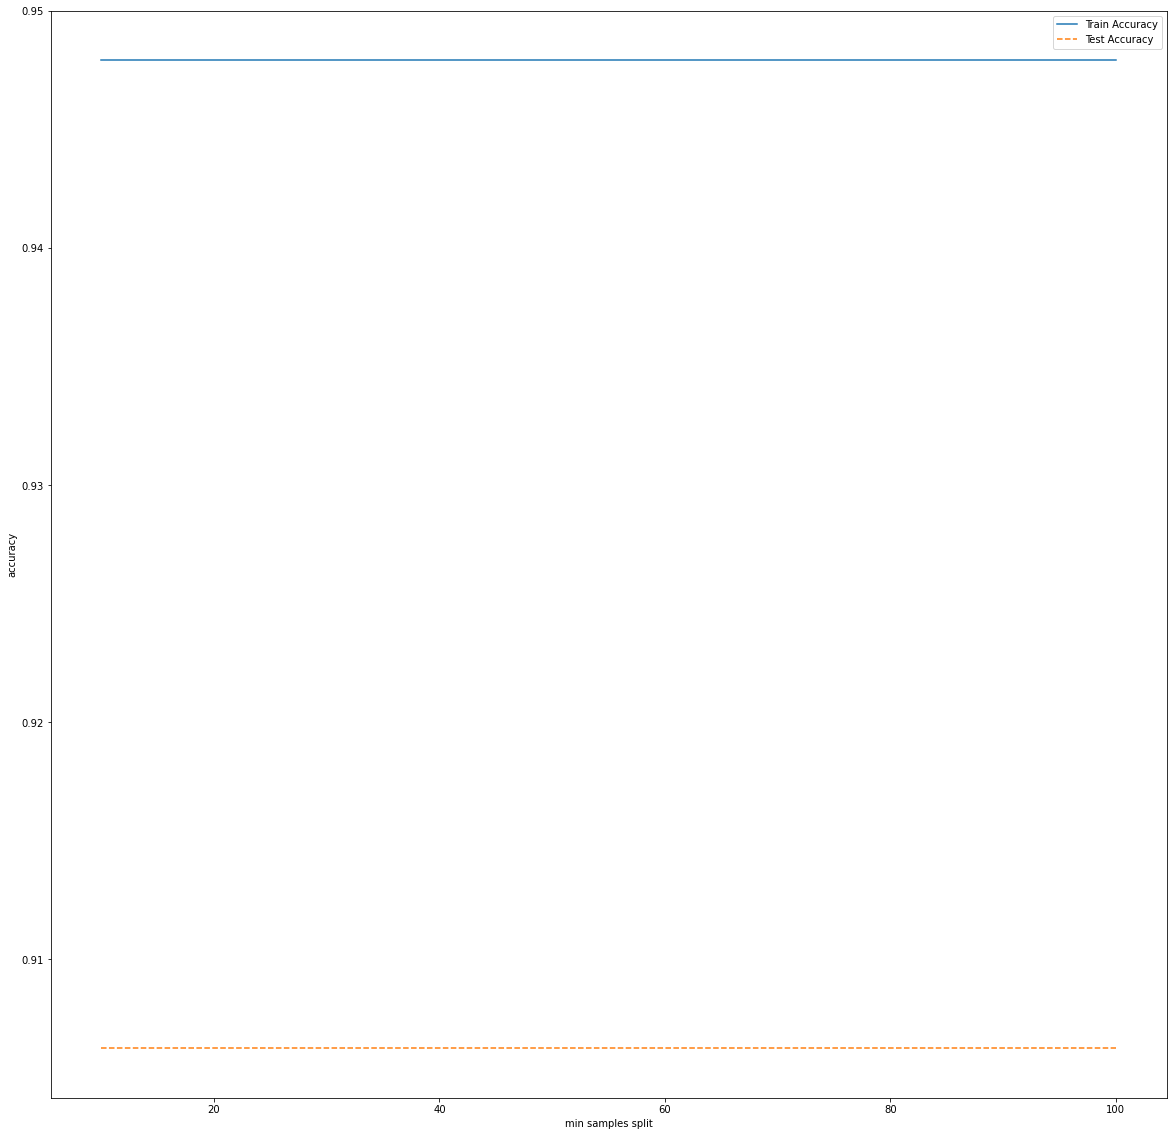

In [102]:
#모델 정확도 그래프로 확인

plt.plot(para_split, train_accuracy, linestyle='-', label='Train Accuracy')
plt.plot(para_split, test_accuracy, linestyle = '--', label = 'Test Accuracy')
plt.ylabel('accuracy');plt.xlabel('min samples split')
plt.legend()

## 오류가 났는데 오류를 찾을 수 없어서, depth부터 다시 시작했습니다ㅠㅠ...

In [150]:
#모델 Parameter 조정
#max_depth : 최대 깊이 변경에 따른 모델 성능 

train_accuracy =[] #train 정확도 결과 저장
test_accuracy=[] #test 정확도 결과 저장

# max_depth : 최대 깊이

para_depth = [depth for depth in range(1,11)]
for v_max_depth in para_depth :
    rf=RandomForestClassifier(max_depth=v_max_depth, n_estimators =50 ,random_state=1234)
    rf.fit(df_train_x, df_train_y)
    train_accuracy.append(rf.score(df_train_x,df_train_y))
    test_accuracy.append(rf.score(df_test_x,df_test_y))
    
#데이터 저장하고, 모델 정확도 확인    
    
df_accuracy_depth = pd.DataFrame()
df_accuracy_depth['Depth'] =para_depth
df_accuracy_depth['TrainAccuracy'] =train_accuracy
df_accuracy_depth['TestAccuracy'] =test_accuracy
df_accuracy_depth.round(3)

,Depth,TrainAccuracy,TestAccuracy
0,1,0.938,0.906
1,2,0.979,0.922
2,3,0.990,0.914
3,4,0.995,0.914
4,5,1.000,0.922
5,6,1.000,0.922
6,7,1.000,0.922
7,8,1.000,0.922
8,9,1.000,0.922
9,10,1.000,0.922


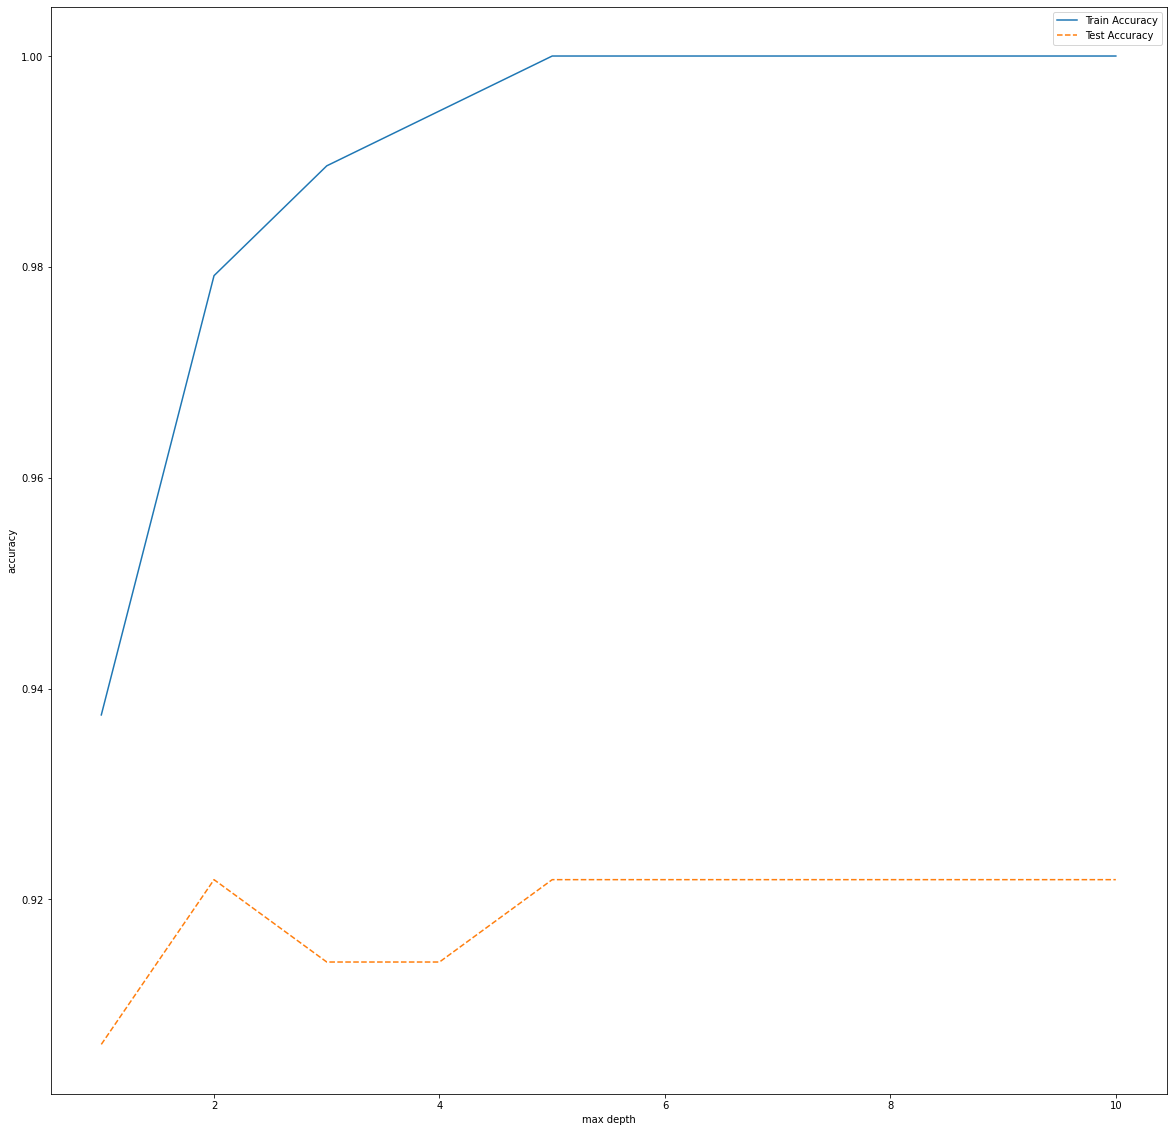

In [151]:
#모델 정확도 그래프로 확인

plt.plot(para_depth, train_accuracy, linestyle='-', label='Train Accuracy')
plt.plot(para_depth, test_accuracy, linestyle = '--', label = 'Test Accuracy')
plt.ylabel('accuracy');plt.xlabel('max depth')
plt.legend()

## 최대 깊이 증가에 따라 모델의 정확도는 증가한다.
## 따라서, train과 test의 성능 변화를 고려하여, 10을 선택한다.

In [157]:
#모델 Parameter 조정
#max_depth : 10 선택
#min_samples_split : 분리 노드 최소 자료 수 변경에 따른 모델 성능 

train_accuracy =[] #train 정확도 결과 저장
test_accuracy=[] #test 정확도 결과 저장

# min_samples_split : 분리 노드의 최소 자료 수

para_split = [n_split*2 for n_split in range(1,11)] #n_split은 2가 최소 단위이다.(나눠야 하므로, 1이 최소 단위가 될 수 없다.)
for v_min_samples_split in para_split :
    rf=RandomForestClassifier(max_depth=10, min_samples_split=v_min_samples_split, n_estimators =50 ,random_state=1234)
    rf.fit(df_train_x, df_train_y)
    train_accuracy.append(rf.score(df_train_x,df_train_y))
    test_accuracy.append(rf.score(df_test_x,df_test_y))
    
#데이터 저장하고, 모델 정확도 확인    
    
df_accuracy_split = pd.DataFrame()
df_accuracy_split['MinSamplesSplit'] =para_split
df_accuracy_split['TrainAccuracy'] =train_accuracy
df_accuracy_split['TestAccuracy'] =test_accuracy
df_accuracy_split.round(3)

,MinSamplesSplit,TrainAccuracy,TestAccuracy
0,2,1.00,0.922
1,4,1.00,0.922
2,6,1.00,0.922
3,8,0.99,0.914
4,10,0.99,0.914
5,12,0.99,0.914
6,14,0.99,0.922
7,16,0.99,0.922
8,18,0.99,0.914
9,20,0.99,0.914


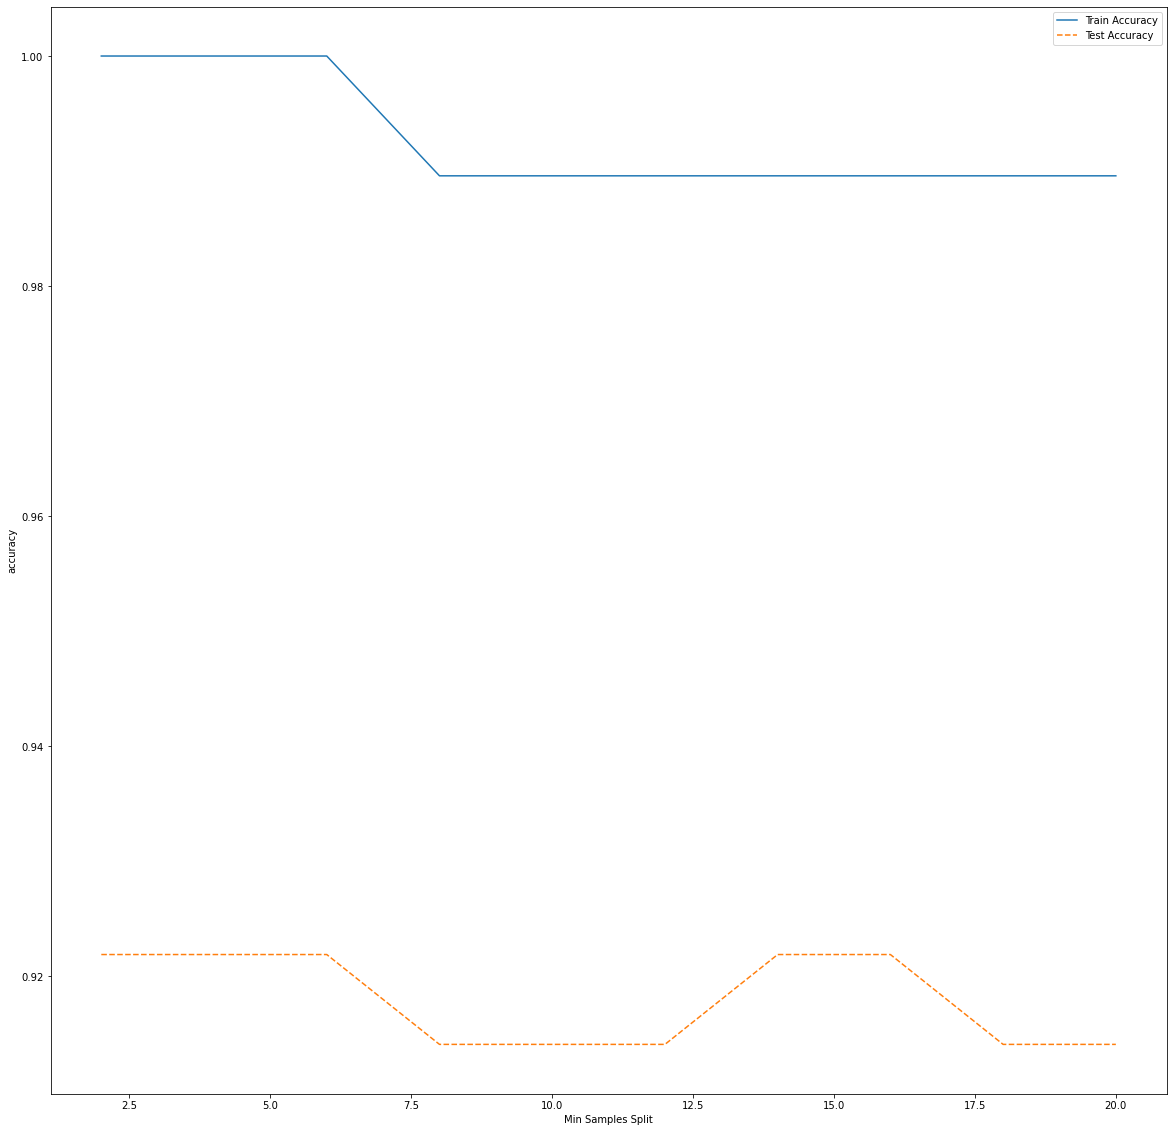

In [158]:
#모델 정확도 그래프로 확인

plt.plot(para_split, train_accuracy, linestyle='-', label='Train Accuracy')
plt.plot(para_split, test_accuracy, linestyle = '--', label = 'Test Accuracy')
plt.ylabel('accuracy');plt.xlabel('Min Samples Split')
plt.legend()

## 분리 노드의 최소 자료 수 증가에 따라 모델의 정확도는 감소한다.
## train/test 데이터 성능 변화를 고려하면, 6 과 14 중에 6 선정

In [167]:
#모델 Parameter 조정
#min_samples_split : 30 선택
#min_samples_leaf : 잎사귀 노드의 최소 자료 수 변경에 따른 모델 성능 

train_accuracy =[] #train 정확도 결과 저장
test_accuracy=[] #test 정확도 결과 저장

# min_samples_leaf : 분리 노드의 최소 자료 수

para_leaf = [n_leaf*1 for n_leaf in range(1,11)]
for v_min_samples_leaf in para_leaf :
    rf=RandomForestClassifier(max_depth=10, min_samples_split=6, min_samples_leaf=v_min_samples_leaf, n_estimators =50 ,random_state=1234)
    rf.fit(df_train_x, df_train_y)
    train_accuracy.append(rf.score(df_train_x,df_train_y))
    test_accuracy.append(rf.score(df_test_x,df_test_y))
    
#데이터 저장하고, 모델 정확도 확인    
    
df_accuracy_leaf = pd.DataFrame()
df_accuracy_leaf['MinSamplesLeaf'] =para_leaf
df_accuracy_leaf['TrainAccuracy'] =train_accuracy
df_accuracy_leaf['TestAccuracy'] =test_accuracy
df_accuracy_leaf.round(3)

,MinSamplesLeaf,TrainAccuracy,TestAccuracy
0,1,1.000,0.922
1,2,0.990,0.914
2,3,0.990,0.922
3,4,0.984,0.922
4,5,0.974,0.922
5,6,0.974,0.922
6,7,0.974,0.914
7,8,0.969,0.914
8,9,0.969,0.914
9,10,0.964,0.906


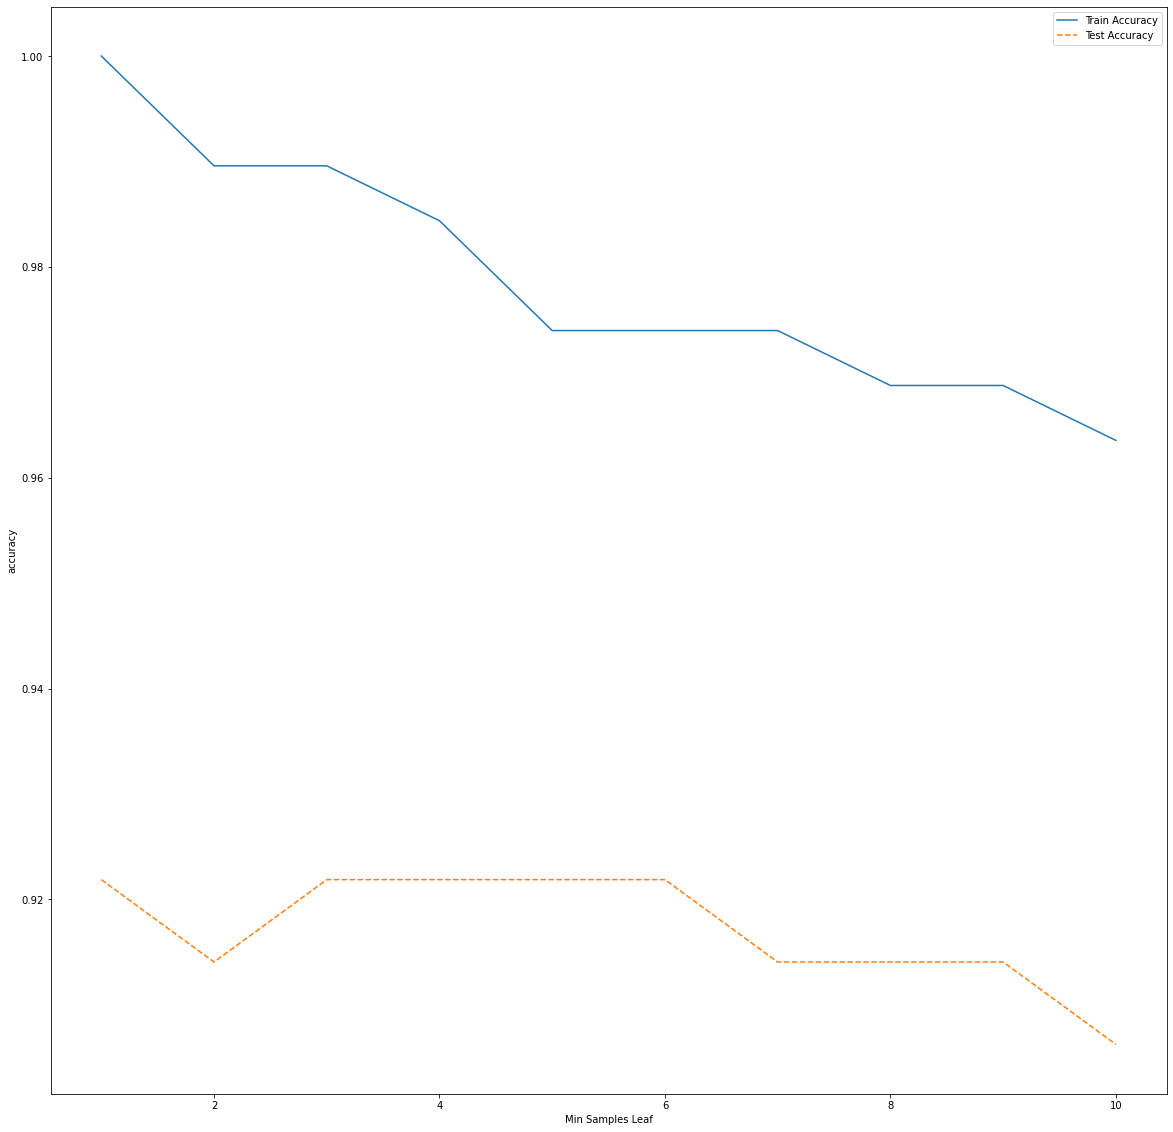

In [168]:
#모델 정확도 그래프로 확인

plt.plot(para_leaf, train_accuracy, linestyle='-', label='Train Accuracy')
plt.plot(para_leaf, test_accuracy, linestyle = '--', label = 'Test Accuracy')
plt.ylabel('accuracy');plt.xlabel('Min Samples Leaf')
plt.legend()

## 잎사귀 노드 최소 자료 수 증가에 따라 모델의 정확도는 감소하므로
## train/test 데이터의 성능 변화를 고려하여, 1 선택

In [179]:
#결론 도출
#최종 모델 생성
#트리 수는 110, 잎사귀 노드는 1, 분리 노드는 30, 최대 깊이는 10

rf_final=RandomForestClassifier(max_depth=10, min_samples_split=6, min_samples_leaf=1, n_estimators =50 ,random_state=1234)
rf_final.fit(df_train_x,df_train_y)

#평가
y_pred=rf_final.predict(df_test_x)

#train 데이터 정확도
print('Accuracy on training set : {:.3f}'.format(rf_final.score(df_train_x,df_train_y)))
#test 데이터 정확도
print('Accuracy on test set : {:.3f}'.format(rf_final.score(df_test_x,df_test_y)))
#confusion matrix
print('Confusion Matrix:\n{}'.format(confusion_matrix(df_test_y,y_pred)))

Accuracy on training set : 1.000
Accuracy on test set : 0.922
Confusion Matrix:
[[27  4]
 [ 6 91]]


## train 정확도는 100.0%, test 정확도는 92.2%로, train 데이터에 과대적합이라 할 수 있으나, 랜덤 포레스트는 어느 정도 train과 test의 간격이 차이가 나야 좋은 모델이라고 할 수 있다.
## 다른 예제들과 달리, 데이터 자체의 양이 많지 않으므로, scale을 10이 아닌, 1 또는 2로 설정하여 확인하여, 적절한 값을 선택하여 정확도를 선정하였다.
## train의 정확도는 100%로 높은 정확도를 나타내는 모델이라고 할 수 있다.
## Confusion Matrix는 위와 같다.
## 정분류율 :92.1875%, 오분류율: 7.8125% 이다.

In [180]:
#결론 도출
#설명변수의 중요도 : feature_importances_
v_feature_name = df_train_x.columns #변수명

#tree.feature_importances_ :설명변수의 중요도 확인 및 테이블로 저장
df_importance = pd.DataFrame()
df_importance['Feature'] =v_feature_name
df_importance['Importance'] =rf_final.feature_importances_

#df_feature_importance 의 테이블을 중요도 순으로 정렬
df_importance.sort_values('Importance', ascending=False, inplace=True)
df_importance.round(3)


,Feature,Importance
6,mean_concavity,0.148
22,worst_perimeter,0.133
27,worst_concave_points,0.106
23,worst_area,0.104
20,worst_radius,0.091
7,mean_concave_points,0.089
3,mean_area,0.050
2,mean_perimeter,0.048
13,area_error,0.034
26,worst_concavity,0.033


Text(0, 0.5, '설명변수')

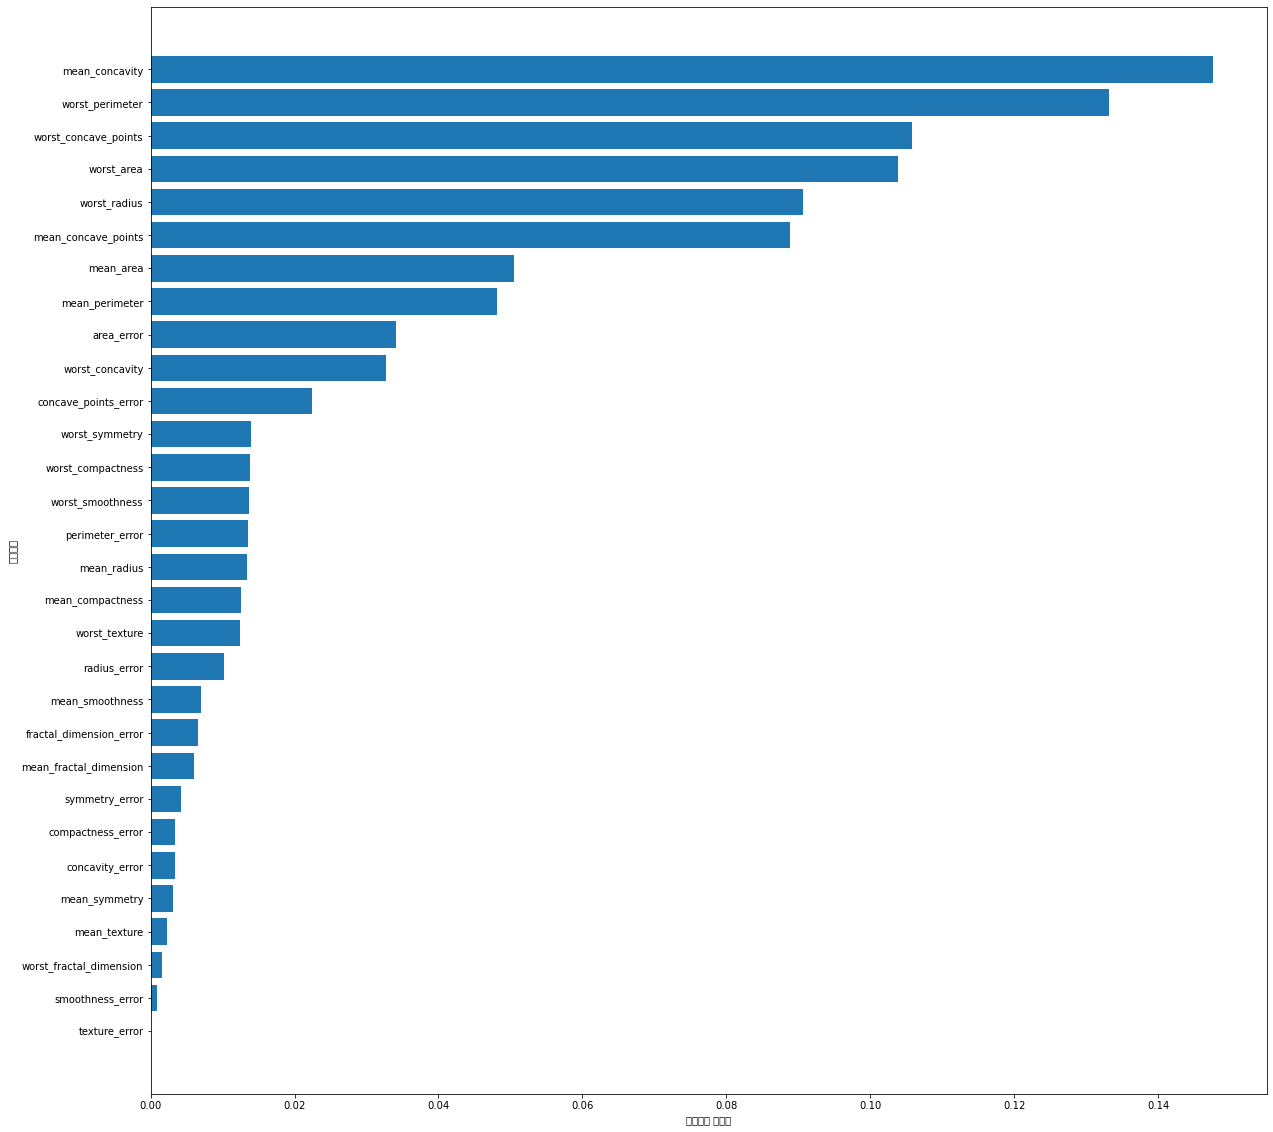

In [182]:
#설명변수 중요도 그래프
#중요도가 높은 변수를 상위에 그림

df_importance.sort_values('Importance', ascending=True, inplace=True)
coordinates = range(len(df_importance))
plt.barh(y=coordinates, width = df_importance['Importance'])
plt.yticks(coordinates, df_importance['Feature'])
plt.xlabel('설명변수 중요도')
plt.ylabel('설명변수')

## 중요 설명 변수는 트리 생성 시, mean_concavity, worst_perimeter 순으로 영향도가 크다 해석 할 수 있다.
## 의사결정 트리에서는 worst_concave_points, worst_area 순으로 영향이 컸으므로, mean_concavity는 세포 평균 오목함과 worst_concave는 세포 최대 오목한 점의 수 이므로, 세포의 오목함이 유방암 진단 결과에 높은 영향도를 보임을 알 수 있고, worst_perimeter는 최대 둘레, worst_area는 최대 면적을 의미하므로, 세포의 크기에 유방암 진단 결과가 높은 영향도를 보임을 알 수 있다.